# 데이터 시각화

## 시각화의 두가지 목적:
### 1. 데이터 탐색(exploration)
### 2. 데이터 전달(communication)

# 3.1 matplotlib

In [1]:
from matplotlib import pyplot as plt

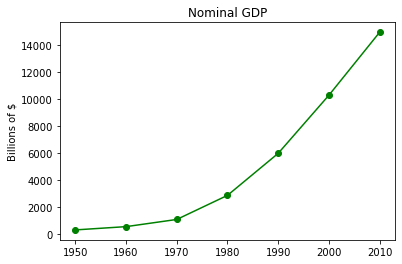

In [5]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# x축에 연도, y축에 GDP가 있는 선 그래프
plt.plot(years, gdp, color='green', marker='o', linestyle="solid")

# 제목을 더하자
plt.title("Nominal GDP")

# y축에 레이블을 추가하자
plt.ylabel("Billions of $")
plt.show()

# 3.2 막대 그래프
막대 그래프는 **이산적인(discrete) 항목**들에 대한 변화를 보여줄 때 사용하면 좋다.

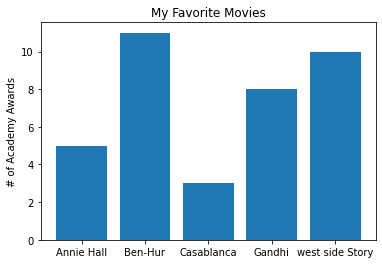

In [8]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "west side Story"]
num_oscars = [5, 11, 3, 8, 10]

# 막대의 x좌표는 [0,1,2,3,4], y좌표는 [num_oscars]로 설정
plt.bar(range(len(movies)), num_oscars)

plt.title("My Favorite Movies")
plt.ylabel("# of Academy Awards")

# x축 각 막대의 중앙에 영화 제목을 레이블로 추가하자
plt.xticks(range(len(movies)), movies)

plt.show()

막대 그래프를 이용하여 **histogram**도 그릴 수 있다.
#### histogram:
정해진 구간에 해당되는 항목의 개수를 보여줌으로 값의 분포를 관찰할 수 있는 그래프 형태이다.

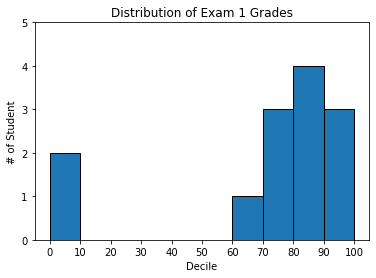

In [11]:
from collections import Counter

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 74, 77, 0]

# 점수를 10점 단위로 그룹화한다. 100점은 90점대에 속한다.
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

# 각 막대를 오른쪽으로 5만큼 옮기고, 각 막대의 높이를 정해 주고 너비는 10으로 하자. 각 막대의 테두리는 검은색으로 설정하자.
plt.bar([x + 5 for x in histogram.keys()], histogram.values(), 10, edgecolor=(0, 0, 0))
plt.axis([-5, 105, 0, 5]) # x축은 -5부터 105 y축은 0 부터 5

plt.xticks([10 * i for i in range(11)])  # x축의 레이블은 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Student")
plt.title("Distribution of Exam 1 Grades")
plt.show ()

plt.bar의 세 번째 인자(argument)는 막대의 너비를 정한다. 여기서는 각 구간의 너비가 10으로 막대의 너비 또한 10으로 설정했다. 또, 막대들을 오른쪽으로5씩 이동해서 '10'에 해당하는 막대의 중점이 15가 되게 했다. 막대 간 구분이 되도록 각 막대의 테두리를 검으색으로 설정했다.
**plt.axis를 사용할때는 특히 조심해야 한다. 막대 그래프를 그릴때 y축을 0에서 시작하지 않으면 아래와 같은 오해를 불러일으키기 쉽다**

Text(0, 0.5, "# of times I heard someone say 'data science'")

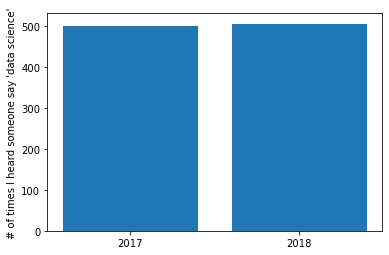

In [32]:
mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

In [13]:
# 아래 코드를 작성하지 않으면 matplotlib이 x축에 0, 1레이블을 달고 주변부 어딘가에 +2.013e3이라고 표기해 둘것이다.

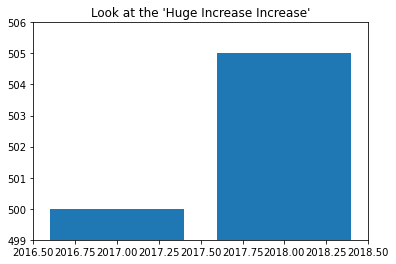

In [25]:
plt.ticklabel_format(useOffset=False)

mentions = [500, 505]
years = [2017, 2018]
plt.bar(years, mentions, 0.8)

# 오해를 불러일으키는 y축은 500 이상의 부분만 보여 줄 것이다.
plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Look at the 'Huge Increase Increase'")
plt.show()

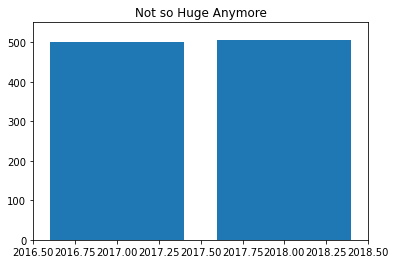

In [27]:
mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.axis([2016.5, 2018.5, 0, 550])
plt.title("Not so Huge Anymore")
plt.show()

# 3.3 선 그래프
plt.plot()을 이용하면 선 그래프(line chart)를 그릴 수 있다. 선 그래프는 어떤 경향을 보여 줄 때 유용하다.

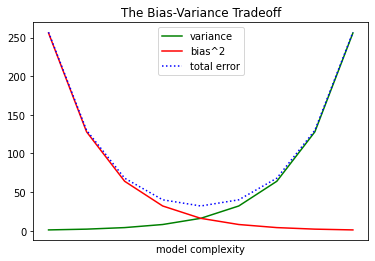

In [44]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# 한 차트에 여러 개의 선을 그리기 위해
# plt.plot을 여러 번 호출할 수 있다.
plt.plot(xs, variance, 'g-', label='variance')  # 실선
plt.plot(xs, bias_squared, 'r-', label='bias^2')  # 일점쇄선
plt.plot(xs, total_error, 'b:', label='total error')  # 점선

# 각 선에 레이블을 미리 달아놨기 때문에 범례(legend)를 쉽게 그릴 수 있다.
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()